# CSM Simulation Groupwork Project

A bank operates with a single service counter. Customers arrive randomly and are served on a first-come, first-served basis. You are required to simulate this system using Python.

## Assumptions
- Inter-arrival times of customers are uniformly distributed between 1 and 8 minutes.
- Service times are uniformly distributed between 1 and 6 minutes.
- There is only one server (single-server queue).
- The queuing discipline is FIFO (First-In, First-Out).

## Task
Your group is expected to:
1. Generate inter-arrival and service times for 500 customers using the specified uniform
distributions.
2. Implement a Python simulation of the system using a discrete-event simulation approach.
3. Compute and report performance metrics.
4. Produce relevant visualizations.

## Setup
Create an environment and activate by running
 ```bash
 python -m venv venv
 venv\Scripts\activate
 pip install ipykernel
 ```

Then install the packages by running the command below:

In [159]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Code Implementation

Import the libraries

In [160]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt

Create an array to store the arrival, service, service start, service end and wait times

And arrays for idle time calculation

In [161]:
simulation_data = [] # Store simulation data for each customer
last_service_end = [0] # List to store service end time for the last customer
total_idle_time = [0] # List to store total idle time for the server when new customer arrives

Created a function to simulate each individual customer

In [162]:
def customer(env, name, counter, inter_arrival_time):
    arrival_time = round(env.now, 2)

    # Queue length (excluding the current customer)
    queue_length_at_arrival = len(counter.queue)

    with counter.request() as req:
        yield req
        service_start_time = round(env.now, 2)
        wait_time = round(env.now - arrival_time, 2)

        # Calculate idle time if any
        if service_start_time > last_service_end[0]:
            idle = round(service_start_time - last_service_end[0], 2)
            total_idle_time[0] += idle
        else:
            idle = 0

        service_time = round(random.uniform(1, 6), 2)
        yield env.timeout(service_time)

        service_end_time = round(env.now, 2)
        time_in_system = round(service_end_time - arrival_time, 2)

        # Update last_service_end
        last_service_end[0] = service_end_time

        simulation_data.append({
            'Customer': name,
            'Inter-Arrival Time': inter_arrival_time,
            'Arrival Time': arrival_time,
            'Queue Length at Arrival': queue_length_at_arrival,
            'Wait Time': wait_time,
            'Service Time': service_time,
            'Service Start Time': service_start_time,
            'Service End Time': service_end_time,
            'Time in System': time_in_system,
            'Idle Time Before Service': idle
        })


Creating a function for Inter-Arrival Time (IAT) for a specific number of customers

In [163]:
max_customers = 500

In [164]:
def IAT(env, counter):
    current_customer = 0
    while current_customer < max_customers:
        # Generate inter-arrival time uniformly between 1 and 8 minutes
        inter_arrival_time = random.uniform(1, 8)
        # print(f'Inter-arrival time for customer {current_customer + 1}: {inter_arrival_time:.2f} minutes')
        yield env.timeout(inter_arrival_time)
        
        # Create a new customer
        current_customer += 1
        
        # Print and process the arrival of the customer
        # print(f'{customer} arrives at {env.now:.2f} minutes')
        env.process(customer(env, current_customer, counter, round(inter_arrival_time, 2)))

Setup environment and resource

In [165]:
env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)  # Single server since we are doing MM1

Start arrival process

In [166]:
env.process(IAT(env, counter))  # Start the inter-arrival time process
env.run()

## Simulation Table

Printing the simulation table using a dataframe

In [167]:
df = pd.DataFrame(simulation_data)
df.to_csv('Simulation_Results.csv', index=False)
df

,Customer,Inter-Arrival Time,Arrival Time,Queue Length at Arrival,Wait Time,Service Time,Service Start Time,Service End Time,Time in System,Idle Time Before Service
0,1,2.02,2.02,0,-0.00,5.30,2.02,7.32,5.30,2.02
1,2,7.26,9.27,0,0.00,1.97,9.27,11.24,1.97,1.95
2,3,6.67,15.94,0,0.00,2.59,15.94,18.53,2.59,4.70
3,4,1.11,17.05,0,1.48,1.04,18.53,19.57,2.52,0.00
4,5,4.35,21.40,0,0.00,5.62,21.40,27.02,5.62,1.83
...,...,...,...,...,...,...,...,...,...,...
495,496,1.07,2190.20,0,1.77,5.13,2191.97,2197.10,6.90,0.00
496,497,4.81,2195.01,0,2.09,2.87,2197.10,2199.97,4.96,0.00
497,498,7.51,2202.53,0,-0.00,4.10,2202.53,2206.63,4.10,2.56
498,499,3.67,2206.19,0,0.44,3.17,2206.63,2209.80,3.61,0.00


## Visualizations

Histogram of Customer Wait Times

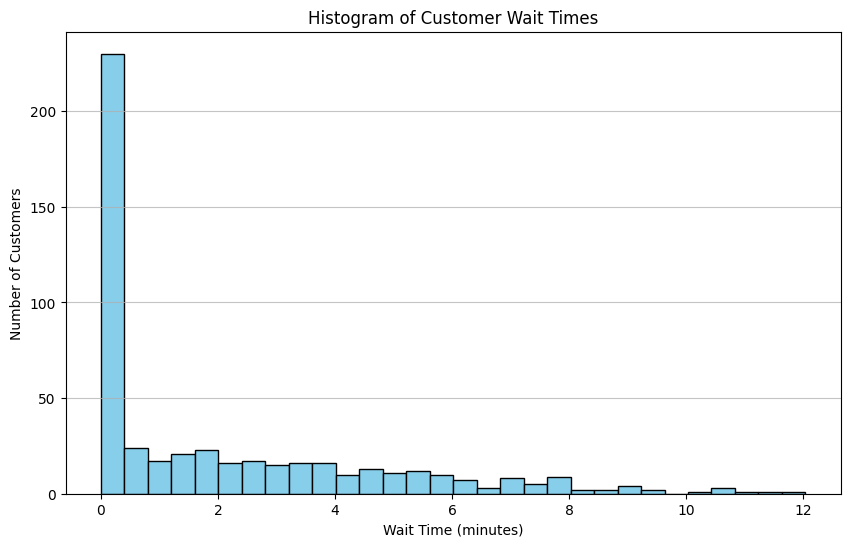

In [168]:
plt.figure(figsize=(10,6))
plt.hist(df['Wait Time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

Histogram of Time in System

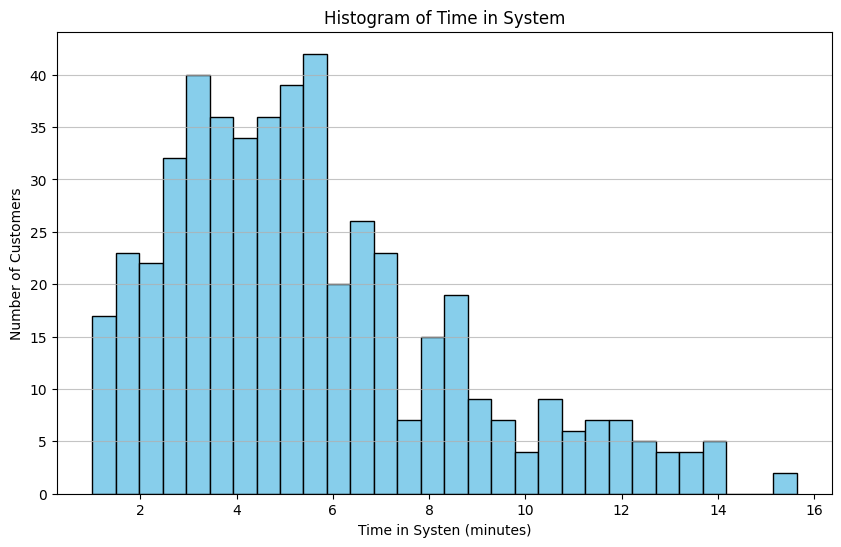

In [169]:
plt.figure(figsize=(10,6))
plt.hist(df['Time in System'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Time in System')
plt.xlabel('Time in Systen (minutes)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

Scatter Plot for Arrival T against Wait T

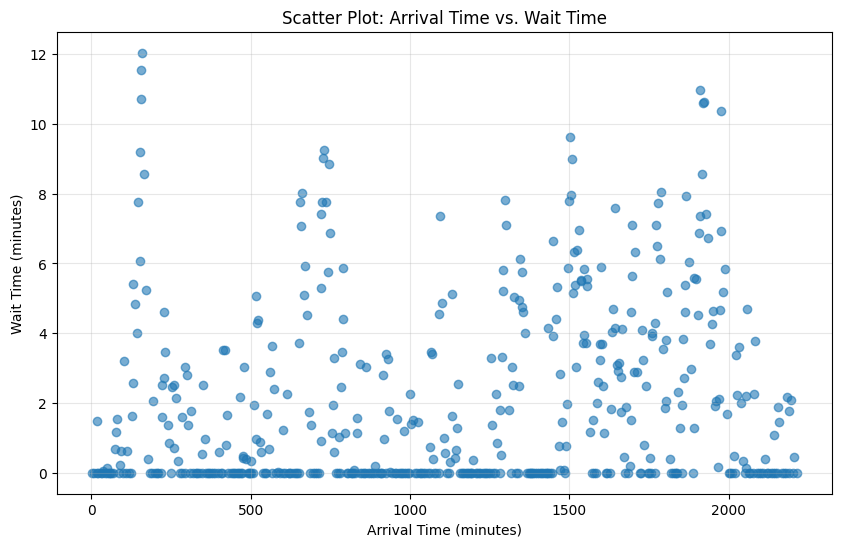

In [170]:
plt.figure(figsize=(10,6))
plt.scatter(df['Arrival Time'], df['Wait Time'], alpha=0.6)
plt.title('Scatter Plot: Arrival Time vs. Wait Time')
plt.xlabel('Arrival Time (minutes)')
plt.ylabel('Wait Time (minutes)')
plt.grid(True, alpha=0.3)
plt.show()

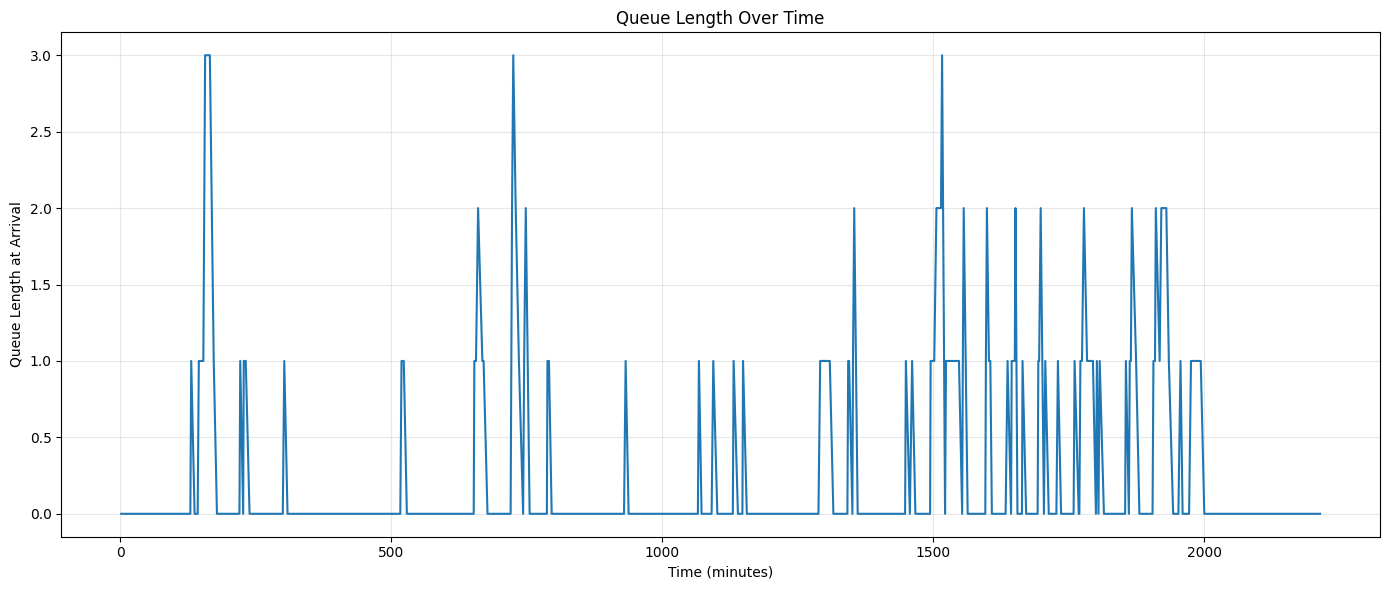

In [175]:
plt.figure(figsize=(14, 6))
plt.plot(df['Arrival Time'], df['Queue Length at Arrival'])
plt.title('Queue Length Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Queue Length at Arrival')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

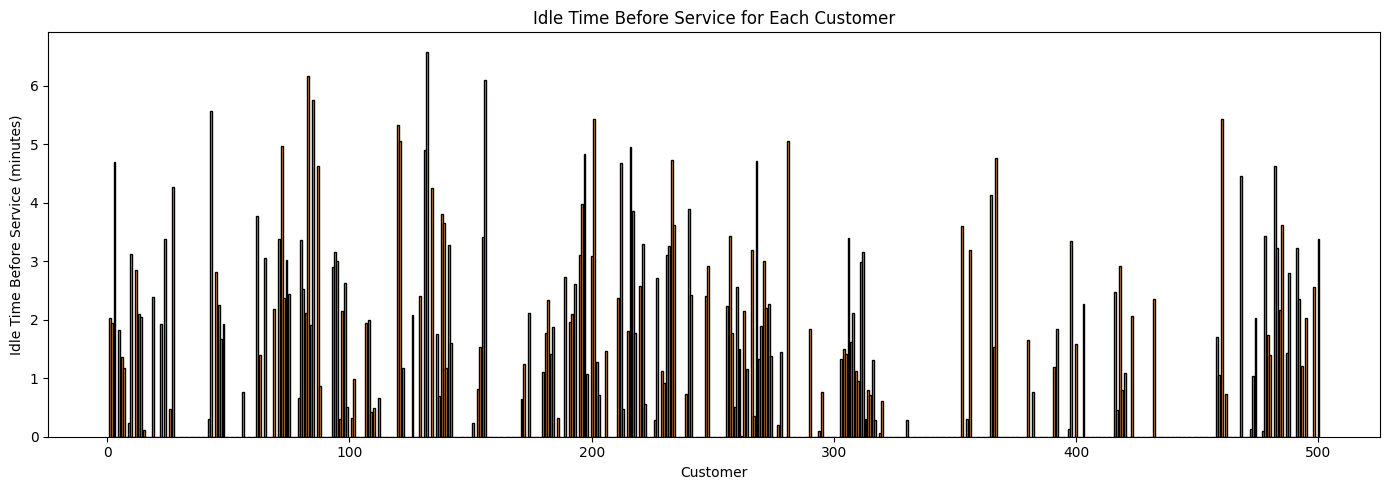

In [171]:
plt.figure(figsize=(14, 5))
plt.bar(df['Customer'], df['Idle Time Before Service'], color='orange', edgecolor='black')
plt.title('Idle Time Before Service for Each Customer')
plt.xlabel('Customer')
plt.ylabel('Idle Time Before Service (minutes)')
plt.tight_layout()
plt.show()


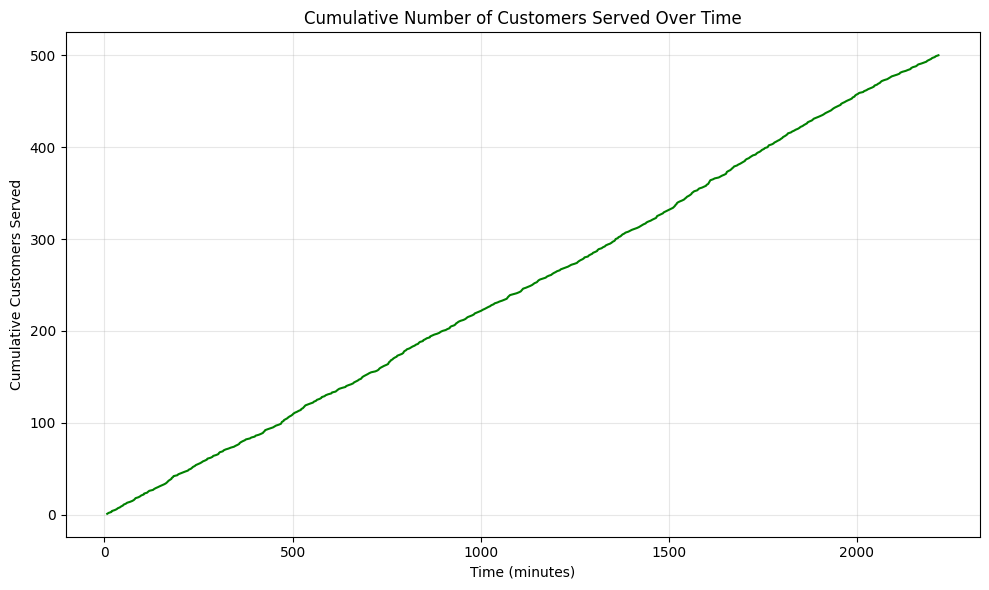

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(df['Service End Time'], range(1, len(df) + 1), color='green')
plt.title('Cumulative Number of Customers Served Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Cumulative Customers Served')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()